In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
import itertools
import numpy as np

In [2]:
def open_picture(f):
    name = f.readline()
    face_num = int(f.readline().rsplit()[0])
    major_axis_radius = list()
    minor_axis_radius = list()
    center_x = list()
    center_y = list()
    for i in range(face_num):
        features = f.readline().rsplit()
        major_axis_radius.append(float(features[0]))
        minor_axis_radius.append(float(features[1]))
        center_x.append(float(features[4]))
        center_y.append(float(features[3]))
    bbox = list()
    for i in range(face_num):
        bbox.append([center_x[i] - major_axis_radius[i], center_y[i] - minor_axis_radius[i],
                   center_x[i] + major_axis_radius[i], center_y[i] + minor_axis_radius[i]])
    pic = scipy.misc.imread('originalPics/'+name.rstrip()+'.jpg', flatten=True)
    return pic, bbox, face_num

In [3]:
f = open('FDDB-folds/FDDB-fold-01-ellipseList.txt')
pic, bbox, face_num = open_picture(f)

In [4]:
def read_picture(pic, bbox, face_num, pixels_per_patch=64):
    croppy = list()
    labels = list()
    size = pixels_per_patch
    w, h = pic.shape
    w = w / size
    h = h / size
    for i in range(w):
        for j in range(h):
            flag = False
            croppy.append(pic[i*size:(i+1)*size,j*size:(j+1)*size])
            for k in range(face_num):
                if((((float(i*size)>bbox[k][0])and(float((i+1)*size)<bbox[k][2])) or
                    ((float(i*size)<bbox[k][0])and(float((i+1)*size)>bbox[k][2])) or
                    ((float((i+1)*size)>bbox[k][0])and(float((i+1)*size)<bbox[k][2])) or 
                    ((float(i*size)>bbox[k][0])and(float(i*size)<bbox[k][2]))) and
                   ((((float(j*size)>bbox[k][1])and(float((j+1)*size)<bbox[k][3])))or 
                     ((float(j*size)<bbox[k][1])and(float((j+1)*size)>bbox[k][3])) or
                     ((float((j+1)*size)>bbox[k][1])and(float((j+1)*size)<bbox[k][3])) or 
                     ((float(j*size)>bbox[k][1])and(float(j*size)<bbox[k][3])))):
                    flag = True
                    labels.append(1)
                    break
            if(not flag):
                labels.append(0)
    return croppy, labels

In [5]:
croppy, labels = read_picture(pic, bbox, face_num, pixels_per_patch=64)

In [6]:
def plot_picture(pic, croppy, labels, pixels_per_patch=64):
    size = pixels_per_patch
    w, h = pic.shape
    w = w / size
    h = h / size
    fig, ax = plt.subplots(w, h, figsize=(3,3))
    for i in range(w):
        for j in range(h):
            if(labels[i*h+j]):
                ax[i,j].imshow(croppy[i*h+j])
            else:
                ax[i,j].imshow(croppy[i*h+j], cmap=plt.cm.gray_r, vmin=0.0, vmax=255.0)
            ax[i,j].axis('off')

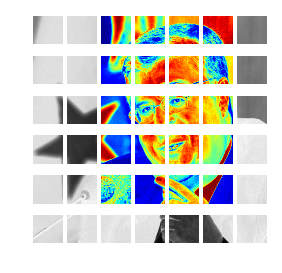

In [7]:
plot_picture(pic, croppy, labels, 64)

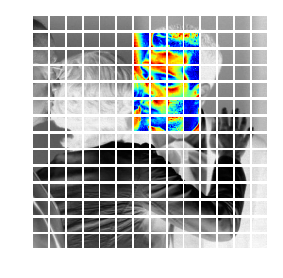

In [9]:
pic, bbox, face_num = open_picture(f)
croppy, labels = read_picture(pic, bbox, face_num, pixels_per_patch=32)
plot_picture(pic, croppy, labels, 32)
f.close()

In [45]:
def generate_data(fold):
    f = open('FDDB-folds/FDDB-fold-'+fold+'.txt')
    num_lines = sum(1 for line in f)
    f.close()
    f = open('FDDB-folds/FDDB-fold-'+fold+'-ellipseList.txt')
    X_train = list()
    y_train = list()
    for i in range(num_lines):
        pic, bbox, face_num = open_picture(f)
        croppy, labels = read_picture(pic, bbox, face_num, pixels_per_patch=64)
        for crop in croppy:
            X_train.append(crop)
        for label in labels:
            y_train.append(label)
    f.close()
    return X_train, y_train

In [46]:
X_train, y_train = generate_data('01')